# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - **1st Dec 2010 - 9th Dec 2011 (One year)**

# Results obtained from Exploratory Data Analysis (EDA)

1. The **customer with the highest number of orders comes from the United Kingdom (UK)** 
2. The **customer with the highest money spent on purchases comes from Netherlands** 
3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below: 
    - United Kingdom 
	- Germany 
	- France
	- Ireland (EIRE)
	- Spain
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below: 
    - United Kingdom 
	- Netherlands
	- Ireland (EIRE)
	- Germany
	- France
5. **November 2011 has the highest sales** 
	- The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December 
6. There are **no transactions on Saturday** between 1st Dec 2010 - 9th Dec 2011 
7. The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward
8. The company receives the **highest number of orders at 12:00pm** 
	- Possibly most customers made purchases during **lunch hour between 12:00pm - 2:00pm**
9. The company tends to **give out FREE items for purchases occasionally each month (Except June 2011)** 
	- However, it is not clear what factors contribute to giving out the FREE items to the particular customers 

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling
import missingno as msno

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [33]:
# specify encoding to deal with different formats
df = pd.read_excel('online_retail_II.xlsx')

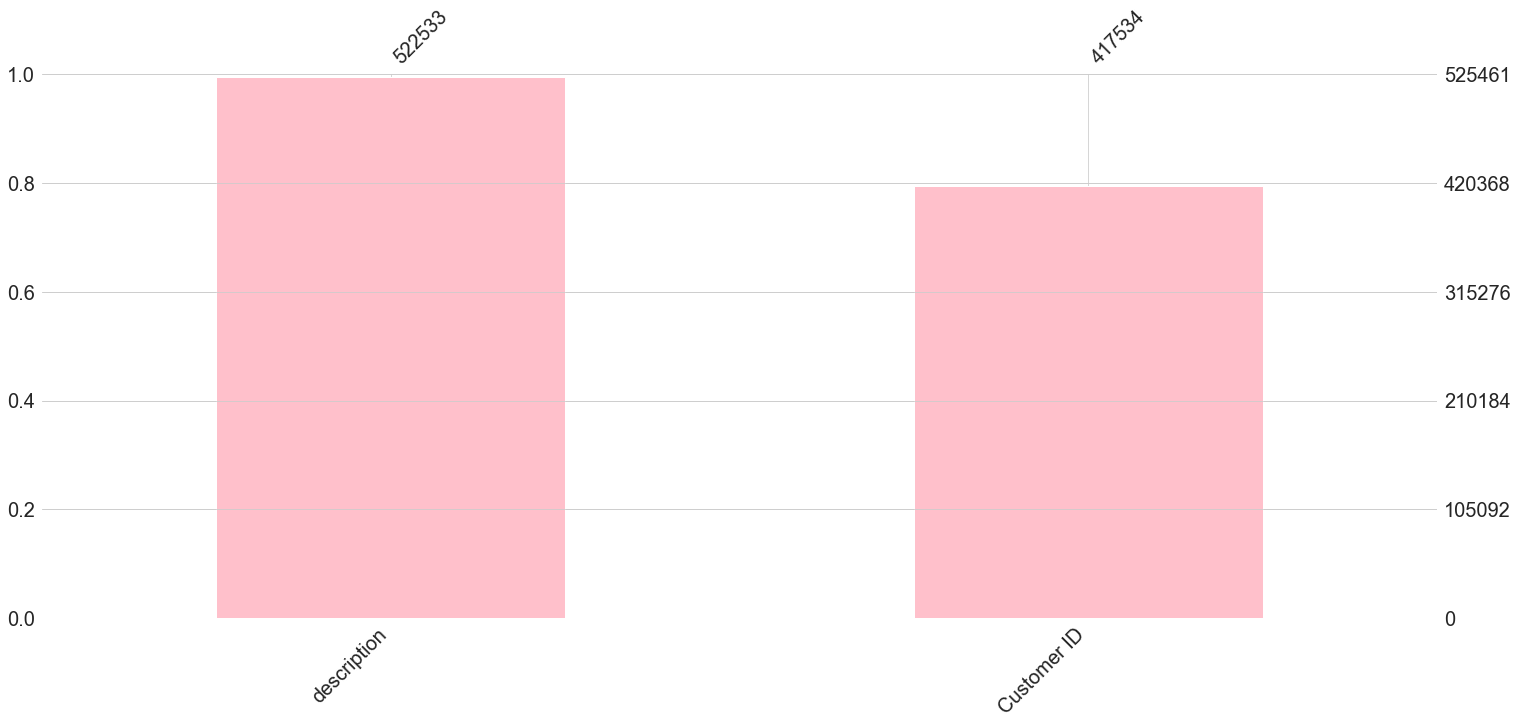

In [28]:
d = df.filter(['description', 'Customer ID'], axis =1)
msno.bar(d,fontsize=20,color='Pink')

In [34]:
df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [35]:
df[df['Invoice'].str.contains("C")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [47]:
df = df['Invoice'].astype(str)

In [48]:
df.info()

AttributeError: 'Series' object has no attribute 'info'

In [43]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [11]:
# Lets check the correlation of our data using the Heat Map
def heat_map(data):
    plt.figure(figsize=(16, 12))
    sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [21]:
df.columns[df.isnull().any()]

Index(['description', 'Customer ID'], dtype='object')

In [ ]:
df.head()

# Data Cleaning 

In [ ]:
df.info()

## Check missing values for each column 

In [9]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Customer ID     107927
description       2928
Invoice              0
stock_code           0
quantity             0
invoice_date         0
Price                0
country              0
dtype: int64

In [ ]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

In [ ]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [ ]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [ ]:
df.head()

## Remove rows with missing values

In [ ]:
# df_new without missing values
df_new = df.dropna()

In [ ]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

In [ ]:
df_new.info()

In [ ]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [ ]:
df_new.head()

In [ ]:
df_new.info()

In [ ]:
df_new.describe().round(2)

## Remove Quantity with negative values

In [ ]:
df_new = df_new[df_new.quantity > 0]

In [ ]:
df_new.describe().round(2)

## Add the column - amount_spent

In [ ]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [ ]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice

In [ ]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [ ]:
df_new.head()

# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

In [ ]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

In [ ]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders

In [ ]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

## How much money spent by the customers?

In [ ]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent

In [ ]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

# Discover patterns for Number of Orders
Credit: https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

## How many orders (per month)?

In [ ]:
# color available
sns.palplot(color)

In [ ]:
df_new.head()

In [ ]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [ ]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

In [ ]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

 ## How many orders (per hour)?


In [ ]:
df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

In [ ]:
ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for Unit Price

In [ ]:
df_new.unit_price.describe()

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

In [ ]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [ ]:
df_free = df_new[df_new.unit_price == 0]

In [ ]:
df_free.head()

In [ ]:
df_free.year_month.value_counts().sort_index()

In [ ]:
ax = df_free.year_month.value_counts().sort_index().plot('bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

**Not clear why there are FREE items given to certain customers**
- On average, the company <span class="mark">gave out 2-4 times FREE items</span> to customers <span class="mark">each month (Except in June 2011)</span>

# Discover patterns for each Country

In [ ]:
df_new.head()

## How many orders for each country?

In [ ]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [ ]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## How much money spent by each country?

In [ ]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [ ]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()